In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import visualize
import world_generator
import evaluation
import projections

In [3]:
N_a, M_a, g_ba = world_generator.generate_world()

coarse_grain_row, coarse_grain_col
0 0
coarse_grain_idx
0
0 1
coarse_grain_idx
1
1 0
coarse_grain_idx
2
1 1
coarse_grain_idx
3


In [4]:
N_a, M_a, g_ba

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[1.05, 0.05, 0.  , 0.  , 0.05, 0.05, 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.05, 1.05, 0.05, 0.  , 0.05, 0.05, 0.05, 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.05, 1.05, 0.05, 0.  , 0.05, 0.05, 0.05, 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.05, 1.05, 0.  , 0.  , 0.05, 0.05, 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.05, 0.05, 0.  , 0.  , 1.05, 0.05, 0.  , 0.  , 0.05, 0.05, 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.05, 0.05, 0.05, 0.  , 0.05, 1.05, 0.05, 0.  , 0.05, 0.05, 0.05,
         0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.05, 0.05, 0.05, 0.  , 0.05, 1.05, 0.05, 0.  , 0.05, 0.05,
         0.05, 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.05, 0.05, 0.  , 0.  , 0.05, 1.05, 0.  , 0.  , 0.05,
         0.05, 0.  , 0.  , 0.  , 0.  ],
      

In [5]:
N_a.shape, M_a.shape, g_ba.shape

((16,), (16, 16), (4, 16))

In [6]:
grid_N_a_0 = visualize.as_grid(N_a)
grid_N_a_0.shape

(4, 4)

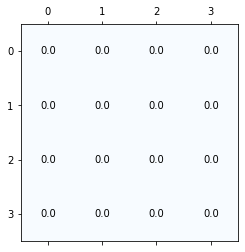

In [7]:
visualize.plot_grid(grid_N_a_0)

In [8]:
results = evaluation.evaluate(M_a, projection_method=projections.Projections().sub_matrix_eigenvector, g_bas=[g_ba], N_a_0=N_a)

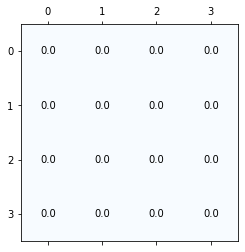

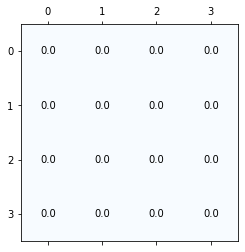

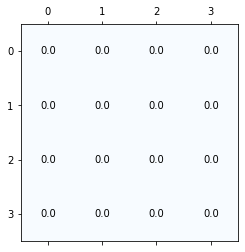

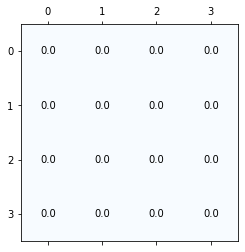

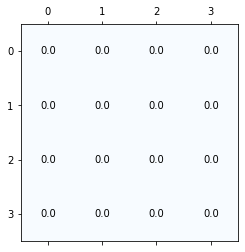

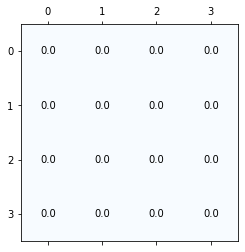

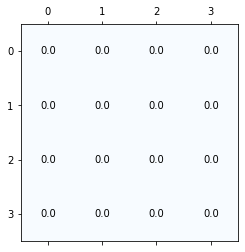

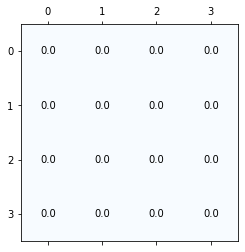

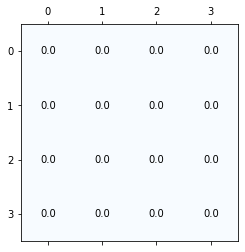

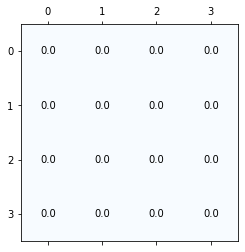

In [9]:
for t, N_a_t in enumerate(results['N_a']):
    grid_N_a_t = visualize.as_grid(N_a_t)
    visualize.plot_grid(grid_N_a_t)

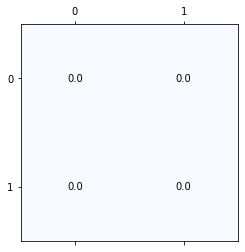

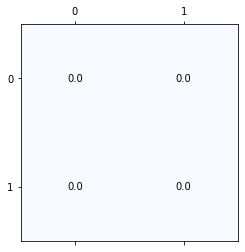

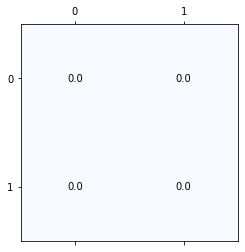

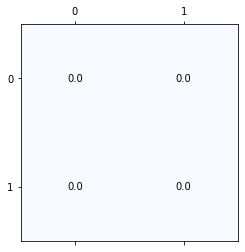

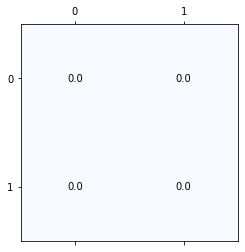

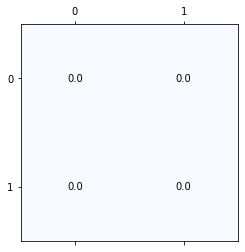

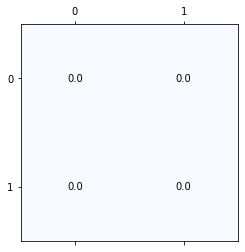

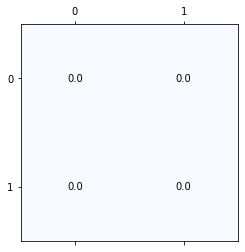

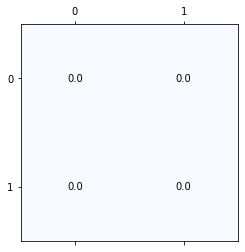

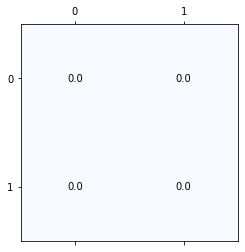

In [10]:
for t, N_b_t in enumerate(results['N_bs'][1]):
    grid_N_b_t = visualize.as_grid(N_b_t)
    visualize.plot_grid(grid_N_b_t)

In [11]:
M_b_0 # M_a   --> element-wise multiply entries {(i, j)} by \delta M_b  < 1 as a function of N_a
M_b_1         --> 
...
M_b_n

SyntaxError: invalid syntax (<ipython-input-11-fbda8c3d1b24>, line 2)